## Models
Models are interfaces through which you interact with any foundation model  
And langchain have made this interface standardised for all models

Two types of models: 
- Language Model
- Embedding Model

### Language Model
That takes text as input and porvides text answer as output

Two types of Language models: 
- LLMs: General purpose language models that provide raw text as output
- Chat Models: Language models that are specialised in conversational tasks

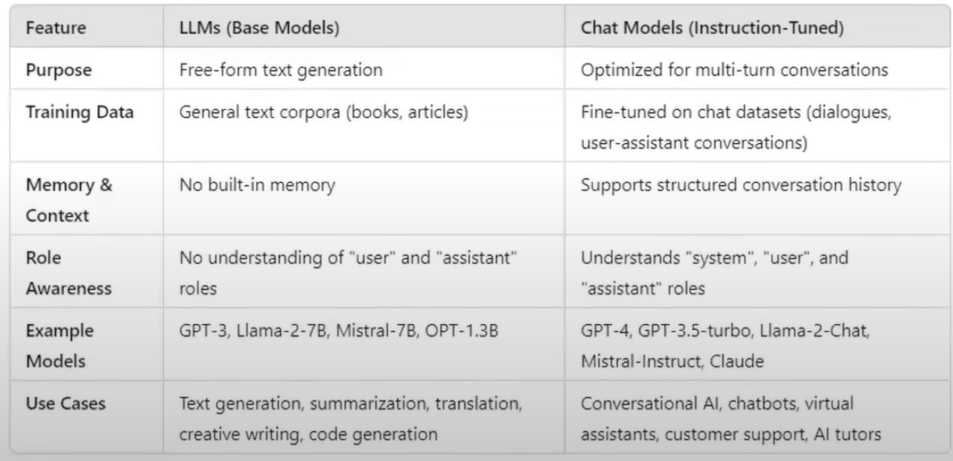

#### Working with Closed Source chat models

In [2]:
## Set up 
from dotenv import load_dotenv
load_dotenv()

True

We learning through Chatmodels, instead of LLMs right now

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

google_model = ChatGoogleGenerativeAI(model='gemini-2.5-flash',temperature=0.8)
google_response = google_model.invoke("Who is spider man? In 10 words only")

print(google_response)

content='Bitten by a spider, Peter Parker becomes a responsible, web-slinging hero.' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []} id='lc_run--019be487-0fa7-75c1-ad22-b4f4ced10fa9-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 12, 'output_tokens': 582, 'total_tokens': 594, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 564}}


The _google_response_ has many key-value pairs, since We are using a Chat model instead of LLM, we will get extra metadata too

In [4]:
print(google_response.content)

Bitten by a spider, Peter Parker becomes a responsible, web-slinging hero.


- ___higher temperature → Creative output___

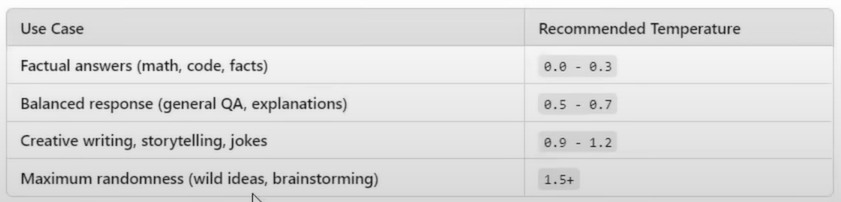

#### Working with Open Source chat models

Open-source models are freely available ai models that can be downloaded, modified, fine-tuned, and deployed without restrictions.

Open source models allow full control and customization 

Difference in Open Source Models and Closed Source Models
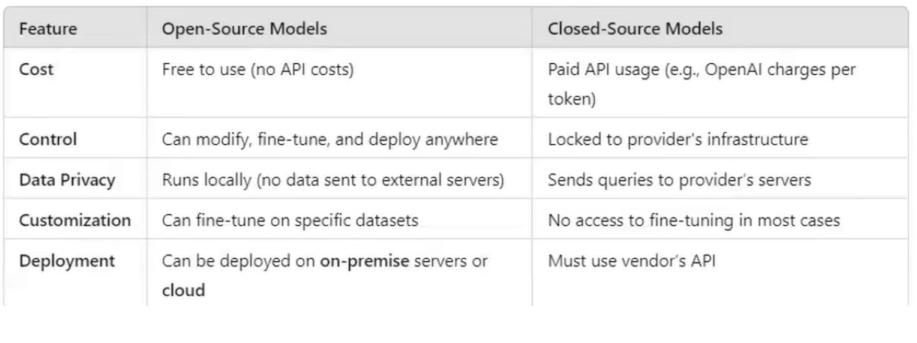

- Where to find Open-source models??  
___HuggingFace___ is the largest repository for open source models. 


- How to use those models?  
    1. HuggingFace provides an inference API (This has a free tier for basic use and testing)
    2. Download and run the model locally

Limitations of open-source models
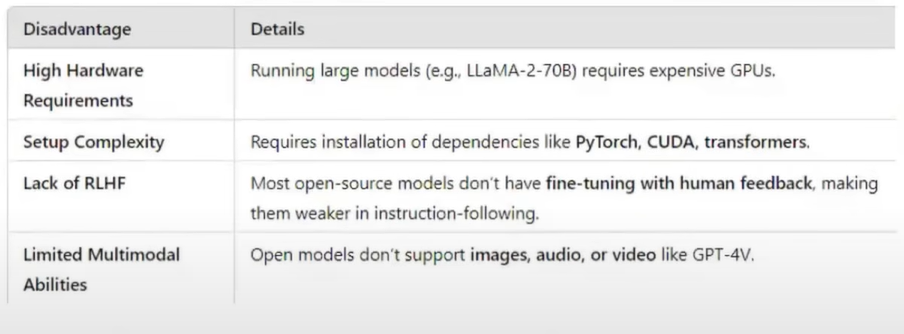

#### _Exploring Open source chat models through hugging face api_

In [5]:
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace

model = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-V3.2",
    task="text-generation",
)

chat = ChatHuggingFace(llm=model, verbose=True)


prompt = "Who is spider man? In 10 words only"

response = chat.invoke(prompt)
response.content

'Web-slinging superhero with a radioactive spider bite.'

_Note: There are many open source models in hugging face that do not support this (to be called through api)._ 

In that case we will get "StopIteration" error

#### _Exploring Open Source model by running it locally_

Note- if the code below is throwing Connection Error, use 
_hf_auth_login_  in the terminal

In [6]:
from langchain_huggingface import HuggingFacePipeline

#Set up the model
llm = HuggingFacePipeline.from_model_id(
    model_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task = 'text-generation',
    pipeline_kwargs=dict(
        temperature=0.7
    )
)

model = ChatHuggingFace(llm=llm)
response = model.invoke("Who is Spider-Man? Use 10 words only.")
print(response)

Device set to use cuda:0


content='<|user|>\nWho is Spider-Man? Use 10 words only.</s>\n<|assistant|>\nSpider-Man is a fictional superhero in comic book and film adaptations. He is known for his incredible strength and agility, as well as his super-powers of spider-like abilities, which give him the ability to climb, swim, and shoot webs from his hands. He is often portrayed as a hero who uses his powers to protect his city and fight crime, often in partnership with other superheroes.' additional_kwargs={} response_metadata={} id='lc_run--019be487-648c-7d02-b96e-caaca0896309-0' tool_calls=[] invalid_tool_calls=[]


### __Embedding Models__
Models that map text into a vector of fixed length in vector space. This represents semantic of the text

_Embedding models are generally used for:_  
Search (where results are ranked by relevance to a query string)  
Clustering (where text strings are grouped by similarity)  
Recommendations (where items with related text strings are recommended)  
Anomaly detection (where outliers with little relatedness are identified)  
Diversity measurement (where similarity distributions are analyzed)  
Classification (where text strings are classified by their most similar label)  


_What are embeddings?_   
Embeddings are dense numerical representations of data such as words, sentences or images in a continuous high-dimensional space where semantic relationships are preserved.

### _Using Closed source embedding models_

```python
from langchain_openai import OpenAIEmbeddings
load_dotenv()

model = OpenAIEmbeddings(
    model="text-embedding-3-small",
    dimensions=32,      #Higher the dimension -> better work
)


result_vector = model.embed_query(text="Superhero named Peter Parker from New York City.")

(Obviously i dont have any credits for api key)

By default, the length of the embedding vector is 1536 for text-embedding-3-small or 3072 for text-embedding-3-large. To reduce the embedding's dimensions without losing its concept-representing properties, pass in the dimensions parameter.

### _Using open source embedding models through hugging face api_

`sentence-transformers/all-MiniLM-L6-v2`  
This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [9]:
from langchain_huggingface import HuggingFaceEmbeddings

In [13]:
embedding_model = HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
result_vector = embedding_model.embed_query("Superhero named Peter Parker from New York City")

print(result_vector)

[-0.02811076119542122, -0.041517216712236404, -0.051788147538900375, -0.012752718292176723, -0.042259957641363144, 0.026622872799634933, 0.051951102912425995, -0.005412193946540356, -0.05326182767748833, -0.025441281497478485, -0.05622784048318863, 0.03638754412531853, -0.10504358261823654, 0.09695138782262802, 0.05123087391257286, 0.10206267237663269, 0.08558597415685654, 0.02874567359685898, 0.022913694381713867, -0.03509780392050743, 0.028413882479071617, -0.055331531912088394, 0.06407595425844193, -0.0427066795527935, -0.0151290874928236, 0.018971215933561325, 0.003940465394407511, 0.0037165728863328695, 0.02248448133468628, -0.00594082148745656, -0.018954971805214882, 0.0030702671501785517, -0.021859774366021156, -0.0048129744827747345, 0.017475085332989693, 0.002311955438926816, 0.008899555541574955, 0.13857944309711456, 0.028787977993488312, -0.053747449070215225, 0.010508478619158268, 0.01561739295721054, -0.05200379714369774, -0.007804218214005232, 0.015726476907730103, -0.027

In [15]:
#Using above model to generate embedding for documents
document = [
    "Superhero named Peter Parker from New York City",
    "Spider-Man is a fictional superhero in comic book and film adaptations",
]
#Now there will be two vector embeddings generated for these two lines in the document

result_vector = embedding_model.embed_documents(document),
print(result_vector)

([[-0.028110742568969727, -0.0415172353386879, -0.05178814008831978, -0.01275271363556385, -0.042259953916072845, 0.026622885838150978, 0.05195111036300659, -0.005412202328443527, -0.05326182767748833, -0.025441275909543037, -0.05622786656022072, 0.036387551575899124, -0.10504359751939774, 0.09695139527320862, 0.051230888813734055, 0.10206267237663269, 0.08558598905801773, 0.02874567359685898, 0.022913679480552673, -0.03509781137108803, 0.02841387689113617, -0.0553315244615078, 0.06407596915960312, -0.04270670562982559, -0.015129086561501026, 0.018971193581819534, 0.003940470051020384, 0.0037165714893490076, 0.022484490647912025, -0.005940828938037157, -0.01895495131611824, 0.0030702371150255203, -0.02185978926718235, -0.004812955390661955, 0.017475096508860588, 0.0023119691759347916, 0.008899579755961895, 0.13857945799827576, 0.028788011521100998, -0.05374746397137642, 0.010508483275771141, 0.015617391094565392, -0.05200379341840744, -0.007804212160408497, 0.015726463869214058, -0.027